In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib.animation as animation
import os, sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path: sys.path.append(nb_dir)
from src import wdata
import seaborn as sns;
from skimage.transform import rescale, resize, downscale_local_mean

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

'''
Sat Start: July 2(182) - September 31()
184-195 --> since there is no 182 --> (July 4th - July 15th)
 
#Radar Start: radar.20170702.00.dat


Files I am going to use:
July 4th 17-18th hour (15 minute on of every hour for satellite)
'''


'\nSat Start: July 2(182) - September 31()\n184-195 --> since there is no 182 --> (July 4th - July 15th)\n \n#Radar Start: radar.20170702.00.dat\n\n\nFiles I am going to use:\nJuly 4th 17-18th hour (15 minute on of every hour for satellite)\n'

In [2]:
imgs2017 = wdata.Radar.getYear(2017)
first_rad = imgs2017[0]
print(first_rad[0])
newradar = []
newsat = []
for tup in imgs2017:
    sat = wdata.Sat.getSatFromRad(tup, 4, 0)
    if sat:
        newradar.append(tup)
        newsat.append(sat)
        

2017-07-04.17


### Get rid of sparse data

In [3]:
#print(imgs2017[0][1])
def isSparse(radarlist):
    # Given radar list gotten from wdata:
    # Will give out names of files that is sparse
    for index in range(len(imgs2017)):
        if wdata.Radar.isSparse(imgs2017[index][1]):
            print(imgs2017[index][0])
            
isSparse(imgs2017)

2017-07-07.13
2017-07-07.14
2017-07-07.15
2017-07-07.16
2017-07-09.02
2017-07-09.03
2017-07-11.02
2017-07-11.03
2017-07-11.04
2017-07-11.05
2017-07-11.06
2017-07-11.07
2017-07-11.08
2017-07-11.09
2017-07-11.10
2017-07-11.11
2017-07-12.14
2017-07-12.15
2017-07-12.16
2017-07-12.17
2017-07-12.18


89
('2017-07-13.00', array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]))


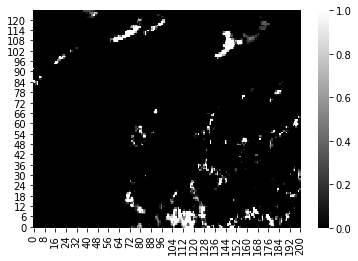

In [4]:
image = imgs2017[-1][1]
fig = sns.heatmap(image, cmap='gray')
fig.invert_yaxis()
print(len(imgs2017)) 
print(imgs2017[-1])

In [5]:
def resizeflat_radar(radar_list, shape): #radar will be the list of radar images, and shape will be the shape you want to resize it to
    '''
    Input: List radar images in numpy arrays, and shape to resize it to (equal to satellite shape)
    Output: List of equal length with resized and flattened numpy arrays of length 10400 (52 x 200)'''
    resized_list = []
    for index in range(len(radar_list)):
        resized_radar = resize(radar_list[index][1], shape)
        resized_list.append((resized_radar.flatten()).tolist())
    return resized_list

#new_radar = resizeflat_radar(imgs2017, (52, 200))
#print(len(new_radar[0]))


In [7]:
test4 = wdata.Sat.getYear(2017, 4)
print(len(test4))


89


In [9]:
#print(test[0])
#print(test[0]['data'][0])
#print(test[0]['data'][0])
print(type(test4))
print(len(test4))

<class 'list'>
89


last <class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.4
    Source: McIDAS Area File
    Satellite Sensor: G-13 IMG    
    dimensions(sizes): xc(200), yc(52), time(1), auditCount(2), auditSize(80)
    variables(dimensions): int32 version(), int32 sensorID(), int32 imageDate(), int32 imageTime(), int32 startLine(), int32 startElem(), int32 time(time), int32 dataWidth(), int32 lineRes(), int32 elemRes(), int32 prefixSize(), int32 crDate(), int32 crTime(), int32 bands(), |S1 auditTrail(auditCount,auditSize), float32 data(time,yc,xc), float32 lat(yc,xc), float32 lon(yc,xc)
    groups: 



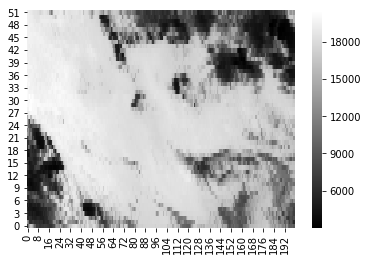

In [10]:
print("last",test4[-1])

fig = sns.heatmap(test4[-1]['data'][0], cmap='gray')
fig.invert_yaxis()

In [11]:
def flatten_sat(sat_list):
    flattened_list = []
    for index in range(len(sat_list)):
        flattened = sat_list[index]['data'][0].flatten()
        flattened_list.append(flattened.tolist())
    return flattened_list




## Get all radar and satellite data

In [12]:
Radar = wdata.Radar.getYear(2017)
Satband3 = wdata.Sat.getYear(2017, 3)
Satband2 = wdata.Sat.getYear(2017, 2)
Satband4 = wdata.Sat.getYear(2017, 4)
Satband6 = wdata.Sat.getYear(2017, 6)

## Reshape all the np arrays

In [13]:
flatSat4 = (np.array(flatten_sat(Satband4))).reshape(-1,1)
flatSat6 = (np.array(flatten_sat(Satband6))).reshape(-1,1)
flatSat3 = (np.array(flatten_sat(Satband3))).reshape(-1,1)
flatSat2 = (np.array(flatten_sat(Satband2))).reshape(-1,1)
print(flatSat4)
print(flatSat6)
flatSat2346 = np.concatenate((flatSat4, flatSat6, flatSat3, flatSat2), axis=1)
print(len(flatSat2346), flatSat2346)
flatSat46 = np.concatenate((flatSat4, flatSat6), axis=1)
flatRad =  (np.array(resizeflat_radar(Radar, (52, 200)))).reshape(-1,1)
print(len(flatRad))

[[20992.]
 [21312.]
 [21024.]
 ...
 [13184.]
 [14784.]
 [13248.]]
[[17888.]
 [17888.]
 [17760.]
 ...
 [13152.]
 [14624.]
 [14336.]]
925600 [[20992. 17888.  8448. 14208.]
 [21312. 17888.  8384. 14560.]
 [21024. 17760.  8448. 14176.]
 ...
 [13184. 13152.  6528.  6560.]
 [14784. 14624.  7168.  7136.]
 [13248. 14336.  6720.  6368.]]


/home/yuan/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


925600


#### Sanity check to make sure I got the same number of pixels

In [14]:
print("length of Sat 2346: ", len(flatSat2346))
print("length of radar: ", len(flatRad))

length of Sat 2346:  925600
length of radar:  925600


Coefficients: 
 [[-4.33327394e-06  8.04382271e-06 -6.06670241e-06 -1.06431012e-06]]
Mean squared error: 0.02
Calculated mean squared error 1.0513500979238338e-05
Variance score: 0.01
Intercept:  [0.03284681]


ValueError: x and y must be the same size

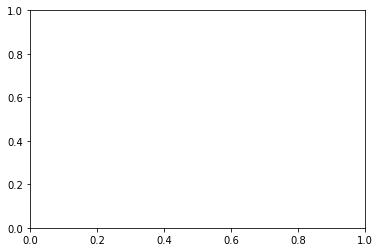

In [23]:
'''
Linear Regression
'''
train_x = flatSat2346[:-10400]
train_y = flatRad[:-10400]
test_x = flatSat2346[-10400:]
test_y = flatRad[-10400:]

regr = linear_model.LinearRegression(normalize=False)

# Train the model using the training sets
regr.fit(train_x, train_y)

# Make predictions using the testing set
y_pred = regr.predict(test_x)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, y_pred))
print("Calculated mean squared error", np.mean(y_pred - test_y)**2)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, y_pred))
print('Intercept: ', regr.intercept_)
# Plot outputs
plt.scatter(test_x, test_y,  color='black')
plt.plot(test_x, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()



## Graphing the bands, and radar to see the results of the linear regression model

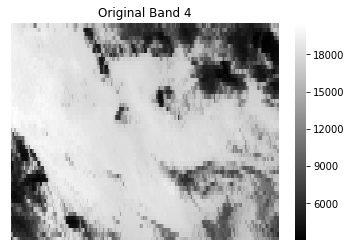

In [17]:
#plt.imshow(flatSat4[-10400:].reshape(52, 200), cmap='gray', origin='lower')
band4 = sns.heatmap(flatSat4[-10400:].reshape(52, 200), cmap='gray')
band4.invert_yaxis()
band4.set_title('Original Band 4')
band4.axes.get_xaxis().set_visible(False)
band4.axes.get_yaxis().set_visible(False)

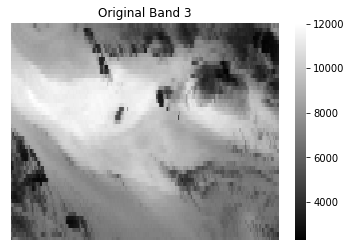

In [18]:
band6 = sns.heatmap(flatSat3[-10400:].reshape(52, 200), cmap='gray')
band6.invert_yaxis()
band6.set_title('Original Band 3')
band6.axes.get_xaxis().set_visible(False)
band6.axes.get_yaxis().set_visible(False)

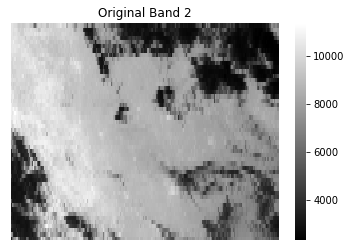

In [19]:
band6 = sns.heatmap(flatSat2[-10400:].reshape(52, 200), cmap='gray')
band6.invert_yaxis()
band6.set_title('Original Band 2')
band6.axes.get_xaxis().set_visible(False)
band6.axes.get_yaxis().set_visible(False)

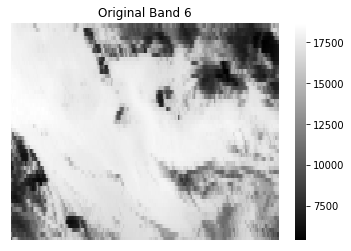

In [20]:
band6 = sns.heatmap(flatSat6[-10400:].reshape(52, 200), cmap='gray')
band6.invert_yaxis()
band6.set_title('Original Band 6')
band6.axes.get_xaxis().set_visible(False)
band6.axes.get_yaxis().set_visible(False)

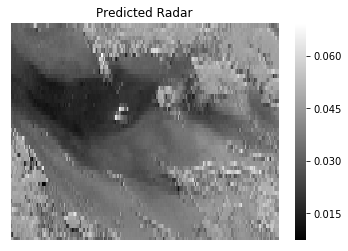

In [21]:
pred = sns.heatmap(y_pred.reshape(52, 200), cmap='gray')
pred.invert_yaxis()
pred.set_title('Predicted Radar')
pred.axes.get_xaxis().set_visible(False)
pred.axes.get_yaxis().set_visible(False)

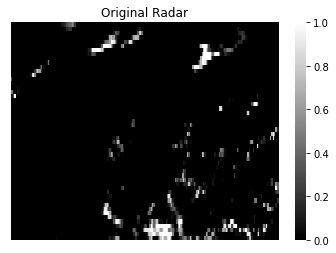

In [22]:
orig = sns.heatmap(test_y.reshape(52, 200), cmap='gray')
orig.invert_yaxis()
orig.set_title('Original Radar')
orig.axes.get_xaxis().set_visible(False)
orig.axes.get_yaxis().set_visible(False)

In [ ]:
def data_read_display(filename):
    """ 
	when passed the full filename (path plus filename) of a deep learning dataset
	This function reads the binary data and rescales it
	reforms it from vector into array of the proper size
	rails the data off at suggested maximum and minimum values
	displays the data as grayscale on black background
    """

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    dims = (126,201)   # rows, columns
    minmax = [0,30]	# suggested data limits for display purposes
    
    # set minmax = [0,0] to use minimum and maximum of each file (excluding missing data)
    # [0,30] mm/hr is a good range for rainfall
    data = np.fromfile(filename,dtype='int16',count=-1,sep='') # 2 byte integers
    #print('size of read vector',len(data))
    data = np.reshape(data,dims)
    #print(data[98]) #max exists in the 98th element row
    
    #print('elemnt of max', np.argmax(data))
    #print('np.max(data)', np.max(data))
    #print('np.min(data)', np.min(data))
    if (np.max(data) > 0):

        # scale data to between 0 and 1 then rail off the extremes
        if (minmax[0] > 0 or minmax[1] > 0):
            data = (data - minmax[0])/(minmax[1] - minmax[0])
            data[(data < minmax[0])] = minmax[0]
            data[(data > minmax[1])] = minmax[1]
        else:
            data = (data - np.min(data))/(np.max(data) - np.min(data))

    else:
        print('empty hour!')

    # display image as grayscale
    plot = sns.heatmap(data, cmap='gray')
    plot.invert_yaxis() # needed if running from command line
    

In [ ]:
data_read_display("/home/yuan/Documents/Spring-2018/Senior Design/Weather/test-radar/radar.20170709.03.dat")

In [ ]:
# Testing another way to get satellite data:
# The size of band 1 is (840, 3168)
# The size of all the other bands are (52, 200)
import numpy as np
from netCDF4 import Dataset
from os import listdir
from os.path import isfile, join
mypath = "/home/yuan/Documents/Spring-2018/Senior Design/Weather/test-satellite/" # change me to your path, all my .nc files are inside /sf_satdata
filepaths = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]
filepaths.sort() # contains all the filepaths


In [ ]:

filepaths_01 = [] # empty list for band 01
filepaths_01.append(filepaths[0]) # the first one is band 01 already
for i in range(len(filepaths)):
    if (i % 5 == 0): # every 5th one is band 01
        filepaths_01.append(filepaths[i])

In [ ]:
print(filepaths_01)

In [ ]:
def get_data(filepaths):
    """
    filepaths: a list containing the filepaths to .nc files
    this function returns a list of 2D arrays of the data inside each file in filepath
    """
    lst = []
    for filepath in filepaths:
        nc_fid = Dataset(filepath, 'r')
        lst.append(nc_fid.variables['data'][:][0])
        nc_fid.close()
    return lst

In [ ]:
data_01 = get_data(filepaths_01)